In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
# from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, Dropout
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import random

Using TensorFlow backend.


In [2]:
def plot_image(X_test,y_test):
    print('loading image...')
    pos = 1
    index = random.randint(0, X_test.shape[0]/2)
    i = index

    plt.figure(figsize=(16,16))

    for img in X_test[index:index+100]:
        plt.subplot(10, 10, pos)
        plt.imshow(img)
        plt.axis('off')
        plt.title(CIFAR100_LABELS_LIST[y_test[i][0]])
        pos += 1
        i += 1

    plt.show()

In [3]:
def load_cifar():
    (cifar_X_1, cifar_y_1), (cifar_X_2, cifar_y_2) = cifar100.load_data(label_mode='fine')

    cifar_X = np.r_[cifar_X_1, cifar_X_2]
    cifar_y = np.r_[cifar_y_1, cifar_y_2]

    cifar_X = cifar_X.astype('float32') / 255
    cifar_y = np.eye(100)[cifar_y.astype('int32').flatten()]

    #data split
    #     X_train, X_test, y_train, y_test = train_test_split(cifar_X, cifar_y,test_size=10000,random_state=42)
    X_train, X_test, y_train, y_test = cifar_X[:50000], cifar_X[50000:], cifar_y[:50000], cifar_y[50000:]
    #call plot_image
    # plot_image(cifar_X_2, cifar_y_2)

    return (X_train, X_test, y_train, y_test)

In [4]:
CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [5]:
def create_model(X_train, Y_train, X_test, batch_size, epochs, lr_rate):
    model = Sequential()
    model.add(Conv2D(32,(3, 3), padding='same',input_shape=X_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(100))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',optimizer=Adam(lr_rate), metrics=['accuracy'])
    
    return model

loading data...
create model...
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 32s 3ms/step
lr_rate: 0.002
Test loss: 3.2039931049346926
Test accuracy: 0.2288
------------------------------------------------------------
create model...
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
12096/50000 [======>.......................] - ETA: 6:12 - loss: 4.0299 - acc: 0.0960

KeyboardInterrupt: 

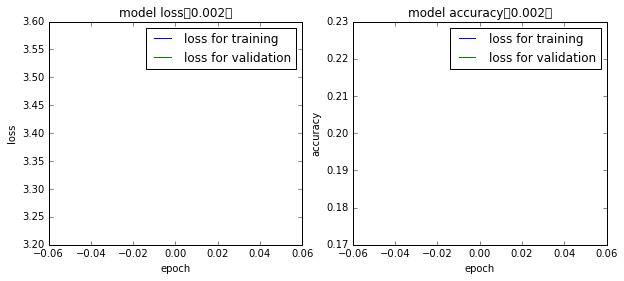

In [6]:
def main():
    batch_size = 64
    epochs = 1
    callbacks = []
    callbacks.append(keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto'))
    
    print('loading data...')
    X_train, X_test, y_train, y_test = load_cifar()
    for i in range(2,5):
        lr_rate = 10 ** -3 * i
        print('create model...')
        model = create_model(X_train, y_train, X_test, batch_size, epochs,lr_rate)
        fit = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,callbacks=callbacks, validation_data=(X_test, y_test))
        score = model.evaluate(X_test, y_test, batch_size=128)

        print('lr_rate:', lr_rate)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        print('-' * 60)

        #loss
        fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
        axL.plot(fit.history['loss'],label="loss for training")
        axL.plot(fit.history['val_loss'],label="loss for validation")
        axL.set_title('model loss[' + str(i) + ']' )
        axL.set_xlabel('epoch')
        axL.set_ylabel('loss')
        axL.legend(loc='upper right')
        #acc
        axR.plot(fit.history['acc'],label="loss for training")
        axR.plot(fit.history['val_acc'],label="loss for validation")
        axR.set_title('model accuracy[' + str(i) + ']')
        axR.set_xlabel('epoch')
        axR.set_ylabel('accuracy')
        axR.legend(loc='upper right')

        fig.savefig('../image/cifar100' + str(i - 1) + '.png')
        model.save("model" + str(i - 1) + ".h5")
    
    SVG(model_to_dot(model).create(prog='dot', format='svg'))


if __name__ == '__main__':
    main()